In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!cp /content/drive/MyDrive/MMDS-Data/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("CustomerPersonalityAnalysis") \
      .getOrCreate()

In [7]:
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql import functions as F

# Visualizing data

In [9]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## People

### Year of Birth

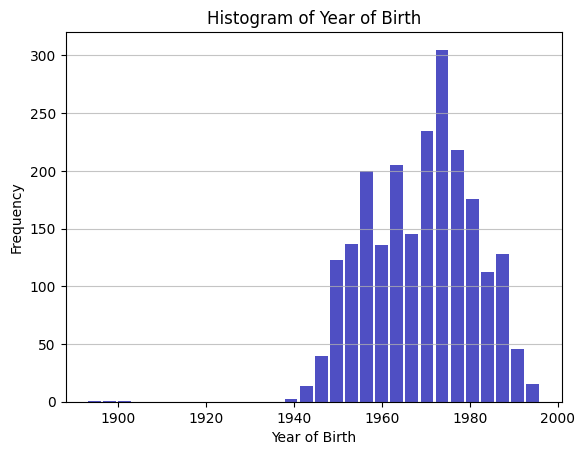

In [11]:
# Histogram illustrates Customer's birth year
plt.hist(df["Year_Birth"], bins=30, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Histogram of Year of Birth')
plt.show()

### Education

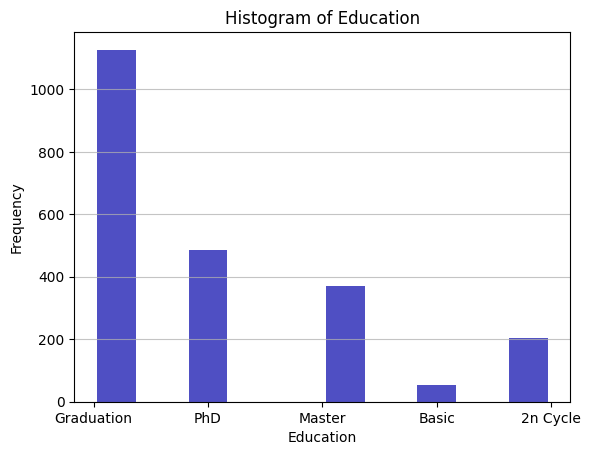

In [12]:
# Histogram illustrates customer's education level
plt.hist(df["Education"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram of Education')
plt.show()

### Marital_Status

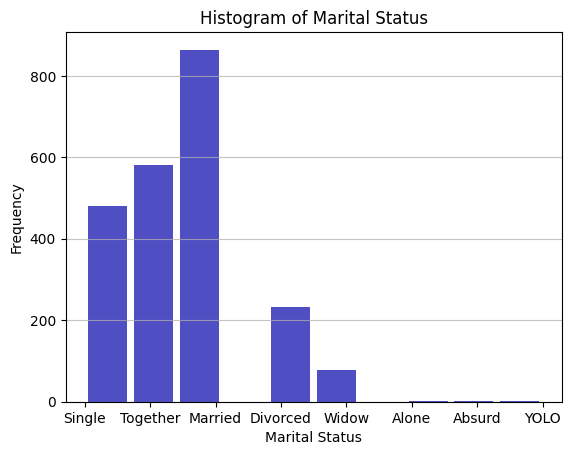

In [13]:
# Customer's marital status
plt.hist(df["Marital_Status"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Histogram of Marital Status")
plt.show()

### Income

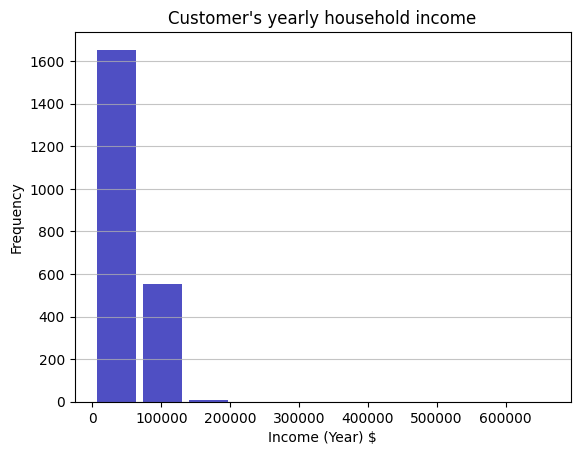

In [16]:
# Histogram illustrates Customer's yearly household income
plt.hist(df["Income"], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Income (Year) $')
plt.ylabel('Frequency')
plt.title('Customer\'s yearly household income')
plt.show()

### Kid Home

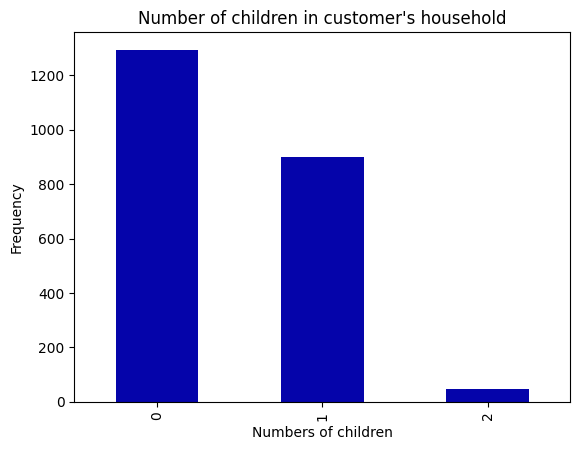

In [17]:
# Histogram illustrate numbers of children in customer's household
df["Kidhome"].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Numbers of children')
plt.ylabel('Frequency')
plt.title('Number of children in customer\'s household')
plt.show()

### Teenhome

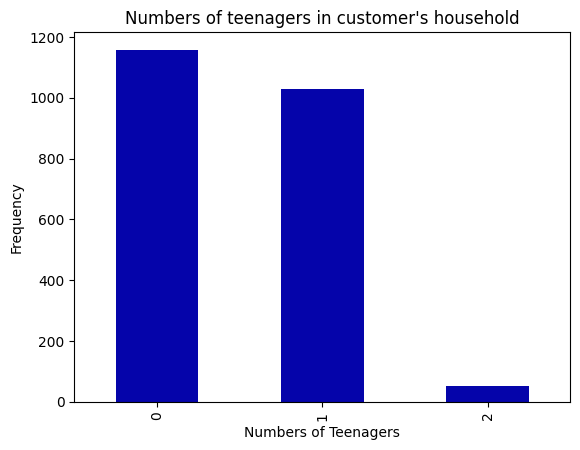

In [18]:
# Histogram illustrate numbers of teenagers in customer's household
df["Teenhome"].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Numbers of Teenagers')
plt.ylabel('Frequency')
plt.title('Numbers of teenagers in customer\'s household')
plt.show()

### Complain

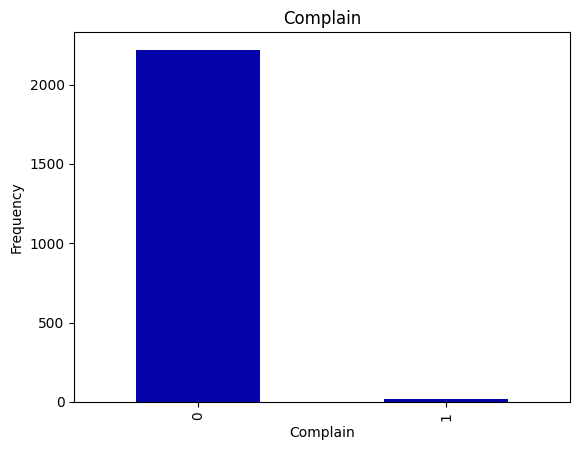

In [23]:
# 1 if the customer complained in the last 2 years, 0 otherwise
df["Complain"].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Complain')
plt.ylabel('Frequency')
plt.title('Complain')
plt.show()

## Products

### MntWines

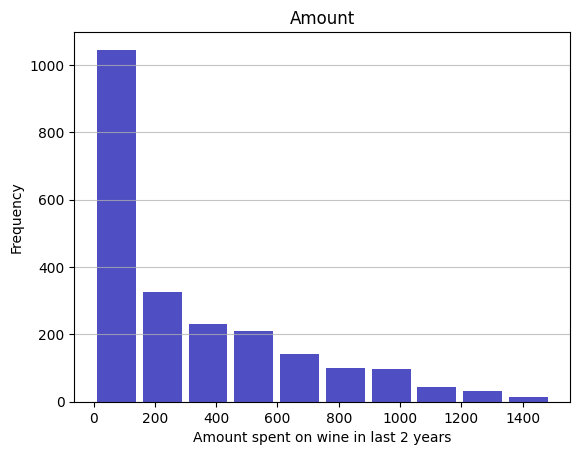

In [34]:
# Amount spent on wine in last 2 years

plt.hist(df['MntWines'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Amount spent on wine in last 2 years')
plt.ylabel('Frequency')
plt.title('Amount')
plt.show()

### MntFruits

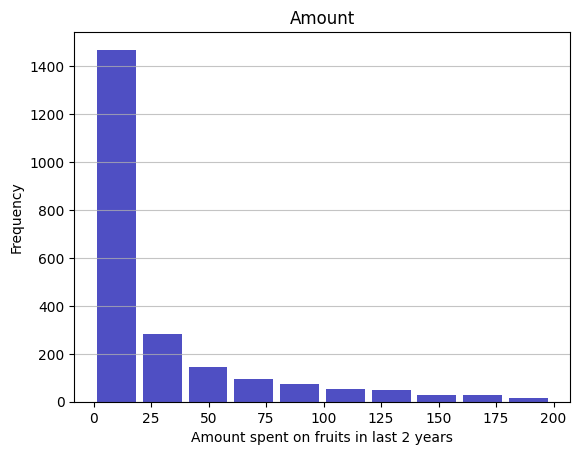

In [35]:
# Amount spent on fruits in last 2 years
plt.hist(df['MntFruits'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Amount spent on fruits in last 2 years')
plt.ylabel("Frequency")
plt.title('Amount')
plt.show()

### MntMeatProducts

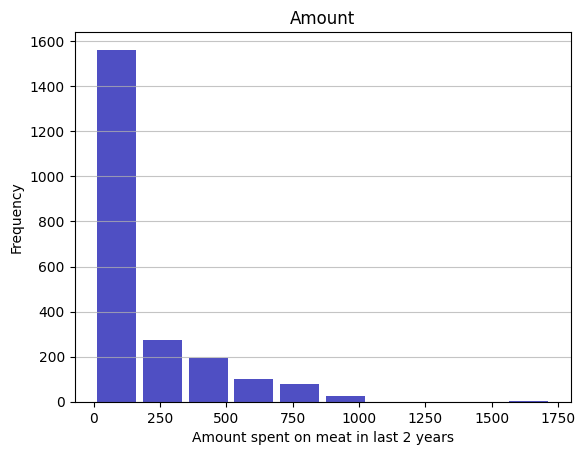

In [36]:
# Amount spent on meat in last 2 years

plt.hist(df['MntMeatProducts'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Amount spent on meat in last 2 years")
plt.ylabel("Frequency")
plt.title("Amount")
plt.show()

### MntFishProducts

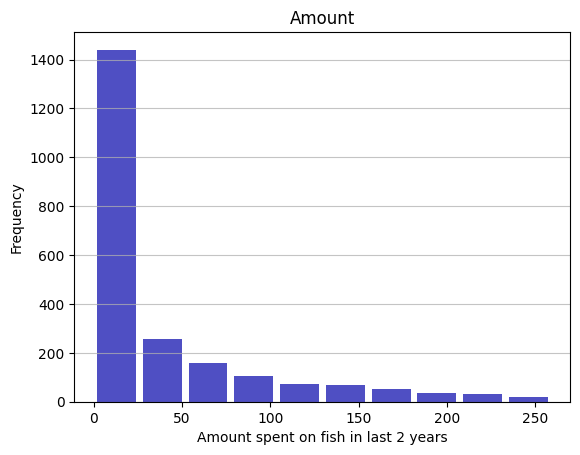

In [37]:
# Amount spent on fish in last 2 years

plt.hist(df['MntFishProducts'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Amount spent on fish in last 2 years")
plt.ylabel("Frequency")
plt.title("Amount")
plt.show()

### MntSweetProducts

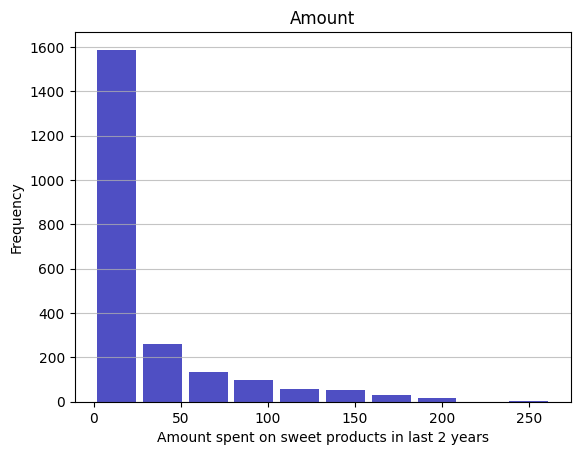

In [38]:
# Amount spent on sweet products in last 2 years

plt.hist(df['MntSweetProducts'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Amount spent on sweet products in last 2 years")
plt.ylabel("Frequency")
plt.title("Amount")
plt.show()

### MntGoldProds

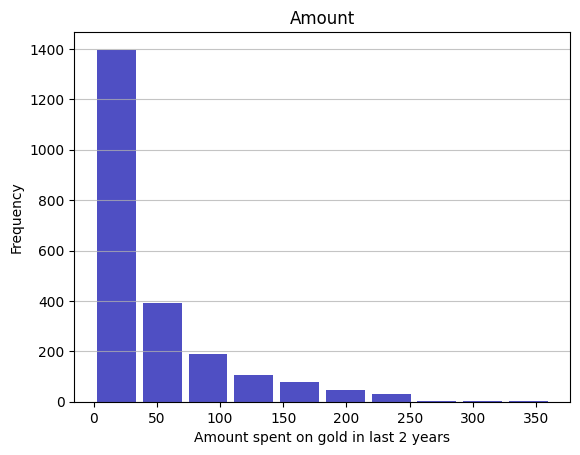

In [33]:
# Amount spent on god in last 2 years

plt.hist(df['MntGoldProds'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Amount spent on gold in last 2 years")
plt.ylabel("Frequency")
plt.title("Amount")
plt.show()

## Promotion

### NumDealsPurchases

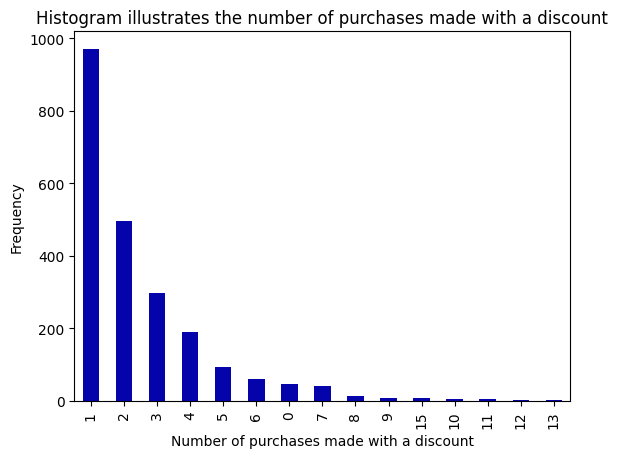

In [44]:
# Number of purchases made with a discount

df['NumDealsPurchases'].value_counts().plot(kind="bar", color='#0504aa')
plt.xlabel('Number of purchases made with a discount')
plt.ylabel('Frequency')
plt.title('Histogram illustrates the number of purchases made with a discount')
plt.show()

### AcceptCmp1

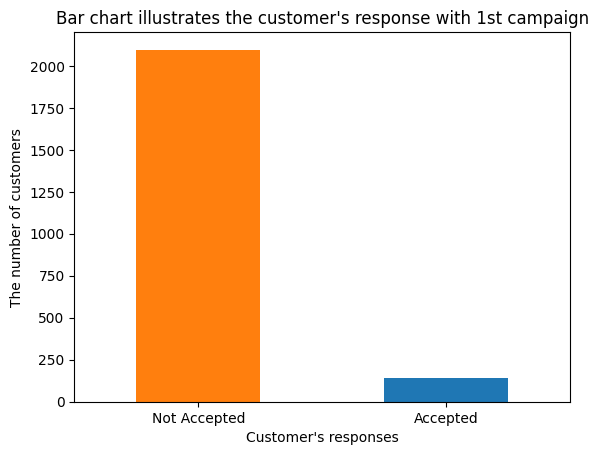

In [59]:
# 1 if customer accepted the offer in the 1st campaign, 0 otherwise

ax = df['AcceptedCmp1'] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Accepted', 'Accepted'], rotation=0)
plt.xlabel('Customer\'s responses')
plt.ylabel('The number of customers')
plt.title('Bar chart illustrates the customer\'s response with 1st campaign')
plt.show()

### AcceptedCmp2

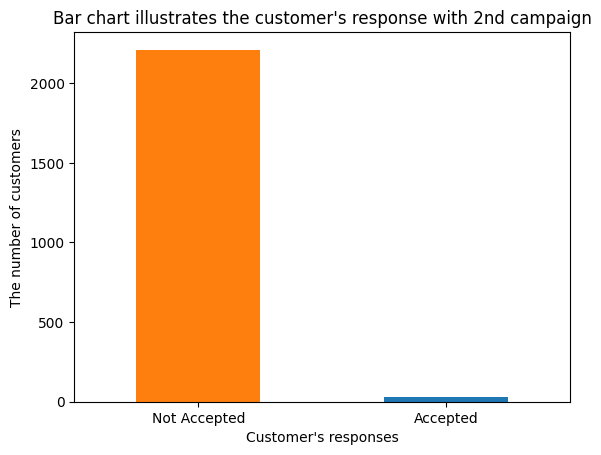

In [61]:
# 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

ax = df["AcceptedCmp2"] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Accepted", "Accepted"], rotation=0)
plt.xlabel("Customer's responses")
plt.ylabel("The number of customers")
plt.title("Bar chart illustrates the customer's response with 2nd campaign")
plt.show()

### AcceptedCmp3

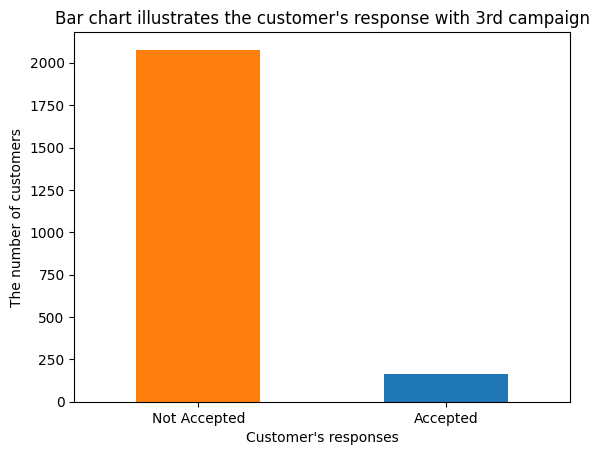

In [62]:
# 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

ax = df['AcceptedCmp3'] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Accepted", "Accepted"], rotation=0)
plt.xlabel("Customer's responses")
plt.ylabel("The number of customers")
plt.title("Bar chart illustrates the customer's response with 3rd campaign")
plt.show()

### AcceptedCmp4

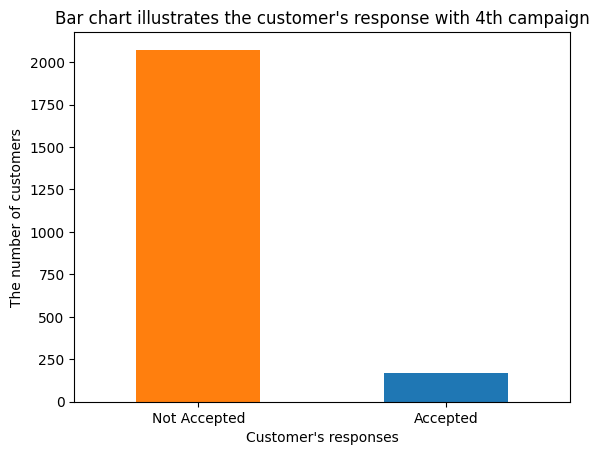

In [63]:
# 1 if customer accepted the offer in the 4th campaign, 0 otherwise
ax = df['AcceptedCmp4'] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Accepted", "Accepted"], rotation=0)
plt.xlabel("Customer's responses")
plt.ylabel("The number of customers")
plt.title("Bar chart illustrates the customer's response with 4th campaign")
plt.show()

### AcceptedCmp5

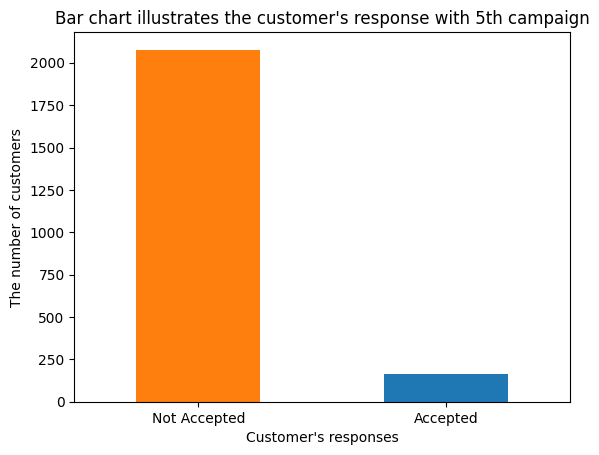

In [65]:
# 1 if customer accepted the offer in the 5th campaign, 0 otherwise

ax = df['AcceptedCmp5'] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Accepted", "Accepted"], rotation=0)
plt.xlabel("Customer's responses")
plt.ylabel("The number of customers")
plt.title("Bar chart illustrates the customer's response with 5th campaign")
plt.show()

### Response

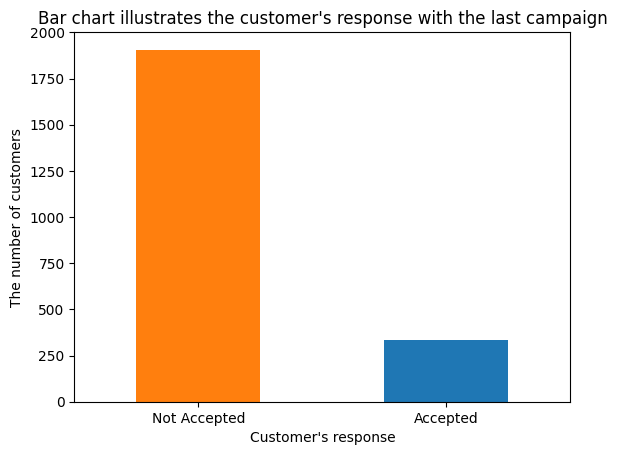

In [67]:
# 1 if the customer accepted the offer in the last campaign, 0 otherwise

ax = df['Response'] \
        .value_counts() \
        .plot(kind="bar", color=['#ff7f0e', '#1f77b4'])
ax.set_xticks([0, 1])
ax.set_xticklabels(["Not Accepted", "Accepted"], rotation=0)
plt.xlabel("Customer's response")
plt.ylabel("The number of customers")
plt.title("Bar chart illustrates the customer's response with the last campaign")
plt.show()

## Place

### NumWebPurchases

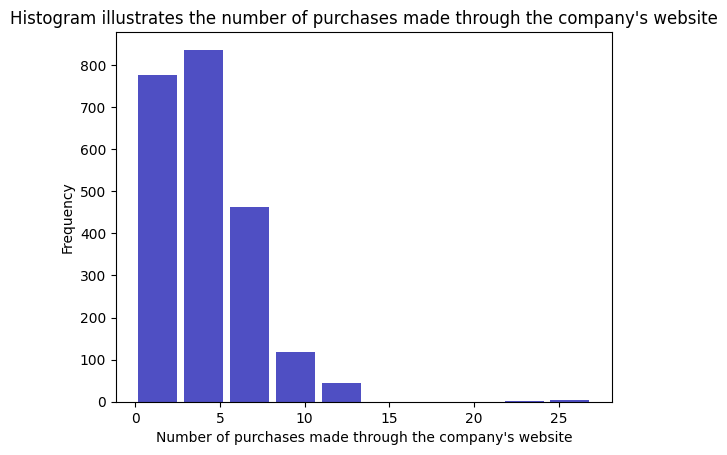

In [71]:
# Number of purchases made through the company's website

plt.hist(df['NumWebPurchases'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel("Number of purchases made through the company's website")
plt.ylabel("Frequency")
plt.title("Histogram illustrates the number of purchases made through the company's website")
plt.show()

### NumCatalogPurchases

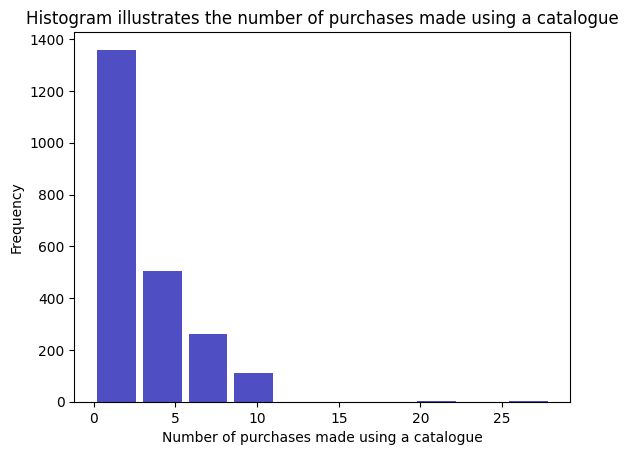

In [72]:
# Number of purchases made using a catalogue

plt.hist(df['NumCatalogPurchases'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel("Number of purchases made using a catalogue")
plt.ylabel("Frequency")
plt.title("Histogram illustrates the number of purchases made using a catalogue")
plt.show()

### NumStorePurchases

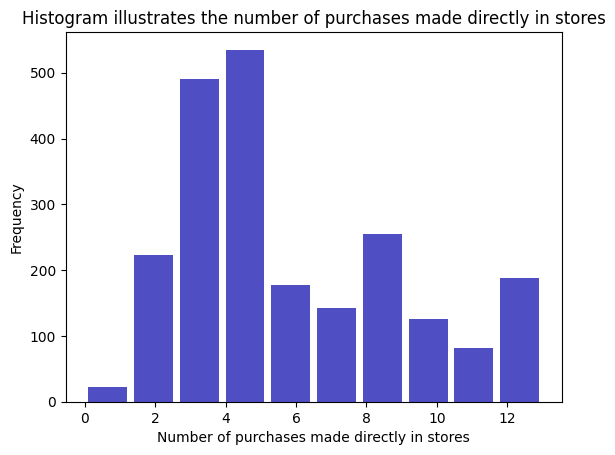

In [73]:
# Number of purchases made directly in stores

plt.hist(df['NumStorePurchases'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel("Number of purchases made directly in stores")
plt.ylabel("Frequency")
plt.title("Histogram illustrates the number of purchases made directly in stores")
plt.show()

### NumWebPurchases

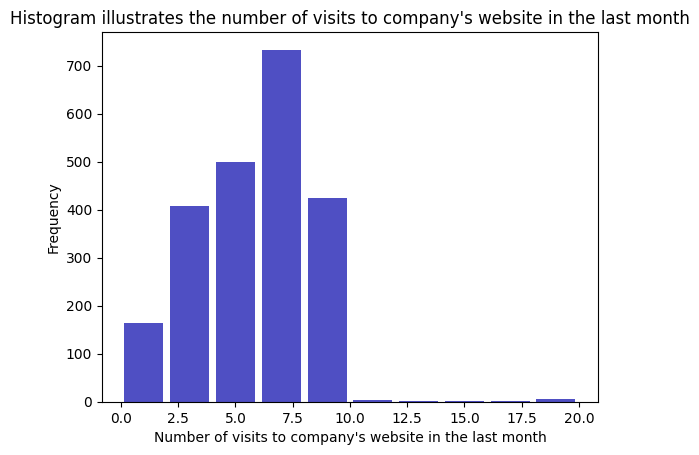

In [74]:
# Number of visits to company's website in the last month

plt.hist(df['NumWebVisitsMonth'], color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel("Number of visits to company's website in the last month")
plt.ylabel("Frequency")
plt.title("Histogram illustrates the number of visits to company's website in the last month")
plt.show()

# Push data to Spark

In [76]:
df = spark.read.csv("marketing_campaign.csv", header=True, inferSchema=True)
df.show(5)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

# Preprocessing/ Cleaning Data

## Find null value in dataset

In [77]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
| ID|Year_Birth|Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+---

## Visualizing NULL values in DF

<BarContainer object of 29 artists>

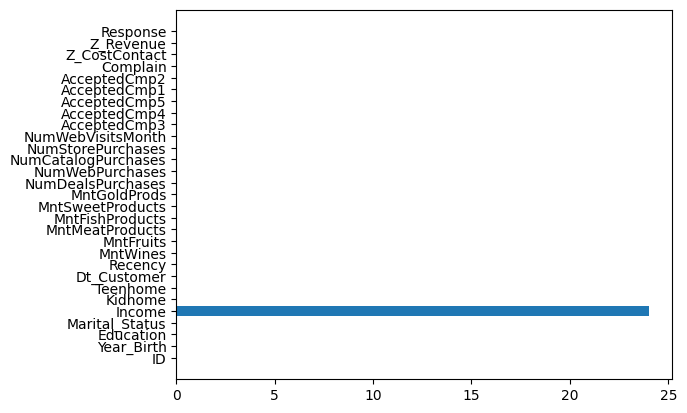

In [78]:
plt.barh(null_count.columns, null_count.collect()[0])

## Drop null example in dataFrame

In [79]:
df = df.na.drop()

In [80]:
null_count = df.select([
    count(when(col(c).contains('None') |\
               col(c).contains('NULL') |\
               (col(c) == '') |\
               col(c).isNull() |\
               isnan(c), c
               )).alias(c)
    for c in df.columns
])

null_count.show()

+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
| ID|Year_Birth|Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+---+----------+---------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+---

## Visualizing NULL data after using df.na.drop() function

<BarContainer object of 29 artists>

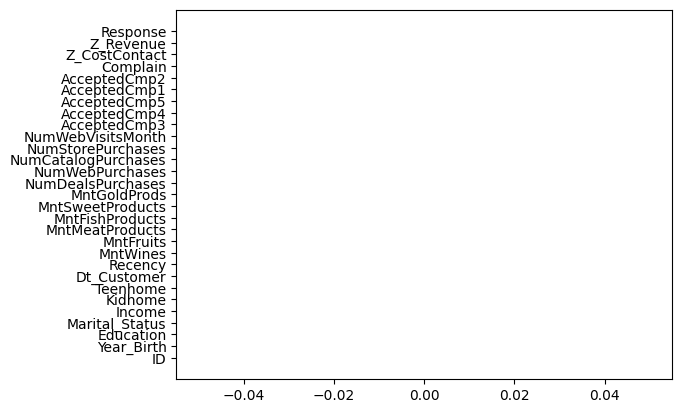

In [81]:
plt.barh(null_count.columns, null_count.collect()[0])

## Processing Datatime format

In [83]:
df = df.withColumn("Year_Birth", F.regexp_replace("Year_Birth", "/", "-"))

df = df.withColumn("Year_Birth", F.col("Year_Birth").cast("date"))

df.show(5)

+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+------------+------------+------------+------------+------------+--------+-------------+---------+--------+
|  ID|Year_Birth| Education|Marital_Status|Income|Kidhome|Teenhome|Dt_Customer|Recency|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntSweetProducts|MntGoldProds|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|AcceptedCmp1|AcceptedCmp2|Complain|Z_CostContact|Z_Revenue|Response|
+----+----------+----------+--------------+------+-------+--------+-----------+-------+--------+---------+---------------+---------------+----------------+------------+-----------------+---------------+-------------------+-----------------+-----------------+----------

## Removing Duplicates

In [84]:
df = df.dropDuplicates()

## Data Normalization

In [85]:
# On-going
from pyspark.ml.feature import MinMaxScaler

scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

scaler_model = scaler.fit(df)

df = scaler_model.transform(df)

df.show(5)

IllegalArgumentException: features does not exist. Available: ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response